# Common Plots

## Introduction

In this chapter, we'll look at some of the most common plots that you might want to make--and how to create them using the most popular libraries. If you need an introduction to these libraries, see the previous chapter.

Bear in mind that for many of the **matplotlib** examples, using the `df.plot.*` syntax can get the plot you want more quickly! To be more comprehensive, the solution for any kind of data is shown in the examples below.

Throughout, we'll assume that the data are in a tidy format (one row per observation, one variable per column). Remember that all Altair plots can be made interactive by adding `.interactive()` at the end.

First, though, let's import the libraries we'll need.

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import altair as alt
from vega_datasets import data

# Set seed for reproducibility
np.random.seed(10)
# Set max rows displayed for readability
pd.set_option('display.max_rows', 6)
# Nicer matplotlib fonts
plt.style.use({'mathtext.fontset': 'stix',
               'font.family': 'STIXGeneral',
               'figure.figsize': (10, 5.5),
               'xtick.labelsize': 20,
               'ytick.labelsize': 20,
               'font.size': 20})

## Scatter plot

In this example, we see a simple scatter plot with categories using the cars data:

In [169]:
cars = data.cars()
cars.head()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration       Year Origin  
0       130.0           3504          12.0 1970-01-01    USA  
1       165.0           3693          11.5 1970-01-01    USA  
2       150.0           3436          11.0 1970-01-01    USA  
3       150.0           3433          12.0 1970-01-01    USA  
4       140.0           3449          10.5 1970-01-01    USA

### Matplotlib

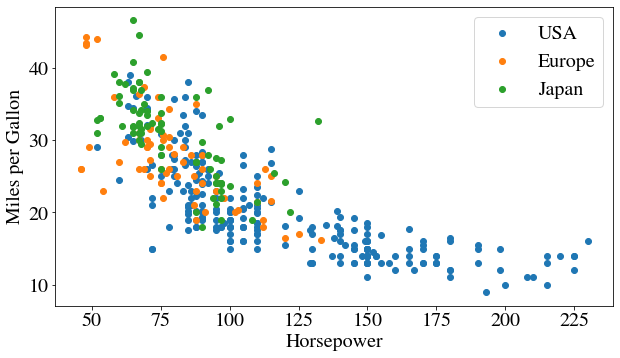

In [279]:
fig, ax = plt.subplots()
for origin in cars['Origin'].unique():
    cars_sub = cars[cars['Origin'] == origin]
    ax.scatter(cars_sub['Horsepower'],
               cars_sub['Miles_per_Gallon'],
               label=origin)
ax.set_ylabel('Miles per Gallon')
ax.set_xlabel('Horsepower')
ax.legend()
plt.show()

### Seaborn

In this first example, I'll also show how to tweak the labels by using the underlying matplolib `Axes` object, here called `ax`.

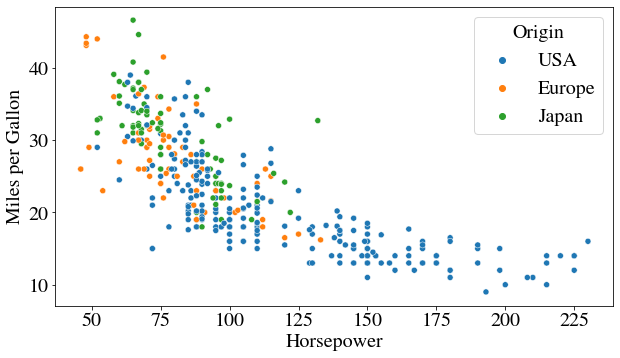

In [171]:
fig, ax = plt.subplots()
sns.scatterplot(data=cars,
                x="Horsepower",
                y="Miles_per_Gallon",
                hue="Origin",
                ax=ax)
ax.set_ylabel('Miles per Gallon')
ax.set_xlabel('Horsepower')
plt.show()

### Plotnine

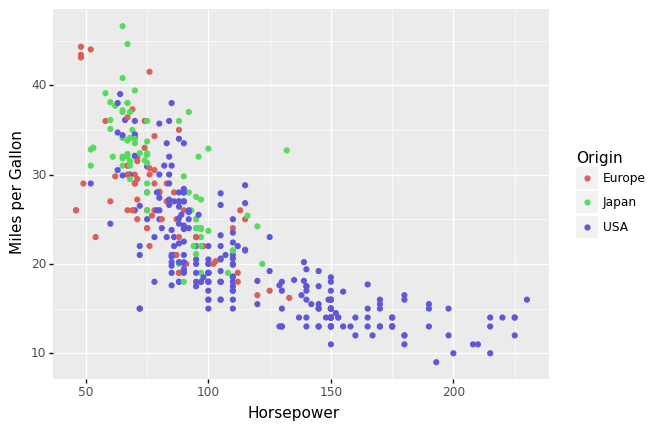

<ggplot: (8794732953561)>

In [172]:
(
    ggplot(cars, aes(x="Horsepower",
                     y="Miles_per_Gallon",
                     color='Origin'))
    + geom_point()
    + ylab('Miles per Gallon')
)

### Altair

For this first example, we'll also show how to make the altair plot interactive with movable axes and more info on mouse-hover.

In [173]:
alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

alt.Chart(...)

## Bubble plot

This is a scatter plot where the size of the point carries an extra dimension of information.

### Matplotlib



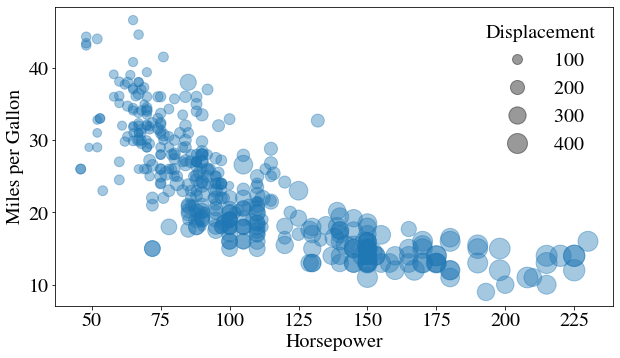

In [174]:
fig, ax = plt.subplots()
scat = ax.scatter(cars['Horsepower'],
               cars['Miles_per_Gallon'],
               s = cars['Displacement'],
               alpha=0.4)
ax.set_ylabel('Miles per Gallon')
ax.set_xlabel('Horsepower')
ax.legend(*scat.legend_elements(prop="sizes", num=4), loc="upper right", title="Displacement", frameon=False)
plt.show()

### Seaborn



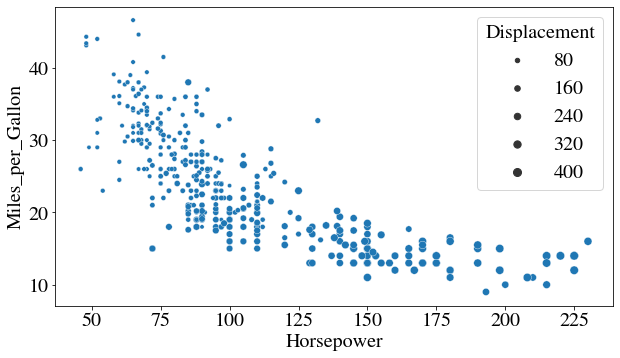

In [175]:
sns.scatterplot(data=cars,
                x="Horsepower",
                y="Miles_per_Gallon",
                size="Displacement");

### Plotnine

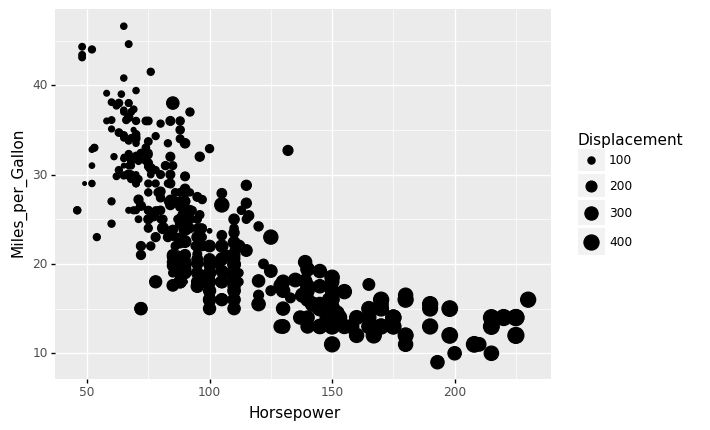

<ggplot: (8794731010708)>

In [176]:
(
    ggplot(cars, aes(x="Horsepower",
                     y="Miles_per_Gallon",
                     size='Displacement'))
    + geom_point()
)

### Altair


In [177]:
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    size='Displacement'
)

alt.Chart(...)

## Line plot

First, let's get some data on GDP growth:

In [178]:
import pandas_datareader.data as web

ts_start_date = pd.to_datetime('1999-01-01')

df = pd.concat([web.DataReader('ticker=RGDP' + x, 'econdb', start=ts_start_date) for x in ['US', 'UK']], axis=1)
df.columns = ['US', 'UK']
df.index.name = 'Date'
df = 100*df.pct_change(4)
df = pd.melt(df.reset_index(),
             id_vars=['Date'],
             value_vars=df.columns,
             value_name='Real GDP growth, %',
             var_name='Country')
df = df.set_index('Date')
df.head()

Country  Real GDP growth, %
Date                                  
1999-01-01      US                 NaN
1999-04-01      US                 NaN
1999-07-01      US                 NaN
1999-10-01      US                 NaN
2000-01-01      US            4.199578

### Matplotlib

Note that **Matplotlib** prefers data to be one variable per column, in which case we could have just run

```python
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title('Real GDP growth, %', loc='right')
ax.yaxis.tick_right()
```

but we are working with tidy data here, so we'll do the plotting slightly differently.

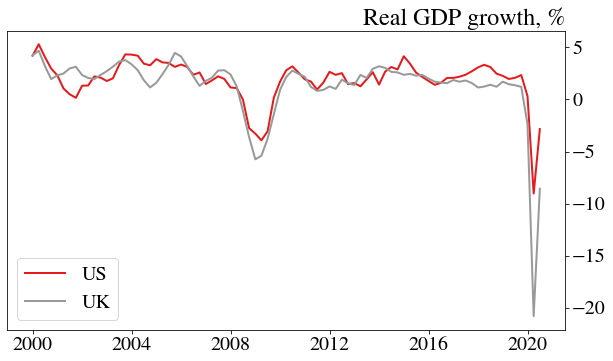

In [179]:
colormap = plt.cm.Set1
colorst = [colormap(i) for i in
           np.linspace(0, 0.9, len(df['Country'].unique()))]
fig, ax = plt.subplots()
for i, country in enumerate(df['Country'].unique()):
    df_sub = df[df['Country'] == country]
    ax.plot(df_sub.index,
               df_sub['Real GDP growth, %'],
               color=colorst[i],
               label=country,
               lw=2)
ax.set_title('Real GDP growth, %', loc='right')
ax.yaxis.tick_right()
ax.legend()
plt.show()

### Seaborn

Note that **seaborn** prefers not to work with an index value so we use `df.reset_index()` to make the 'date' index column into a regular column in the snippet below:

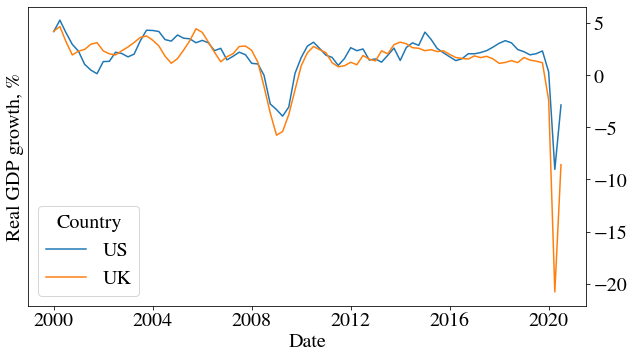

In [180]:
fig, ax = plt.subplots()
sns.lineplot(x="Date", y="Real GDP growth, %",
             hue="Country",
             data=df.reset_index(),
             ax=ax)
ax.yaxis.tick_right()
plt.show()

### Plotnine

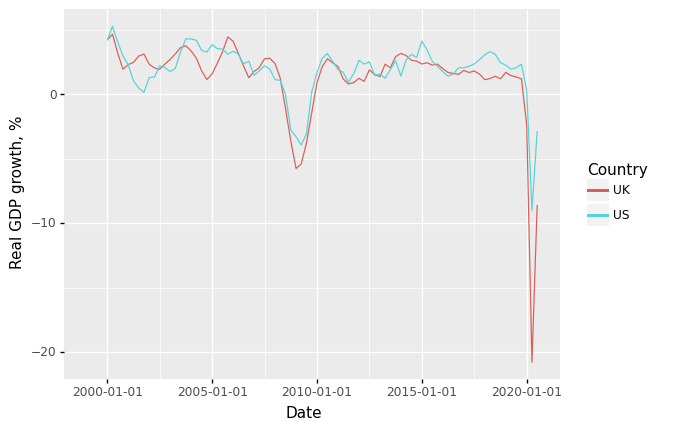

<ggplot: (8794732125444)>

In [181]:
(
    ggplot(df.reset_index(), aes(x='Date',
                                 y='Real GDP growth, %',
                                 color='Country'))
    + geom_line()
)

### Altair

In [182]:
alt.Chart(df.reset_index()).mark_line().encode(
    x='Date:T',
    y='Real GDP growth, %',
    color='Country',
    strokeDash='Country',
)

alt.Chart(...)

## Bar chart

Let's see a bar chart, using the 'barley' dataset.

In [183]:
barley = data.barley()
barley = pd.DataFrame(barley.groupby(['site'])['yield'].sum())
barley.head()

yield
site                      
Crookston        748.39997
Duluth           559.93334
Grand Rapids     498.63334
Morris           708.00001
University Farm  653.33335

### Matplotlib

Just remove the 'h' in `ax.barh` to get a vertical plot.

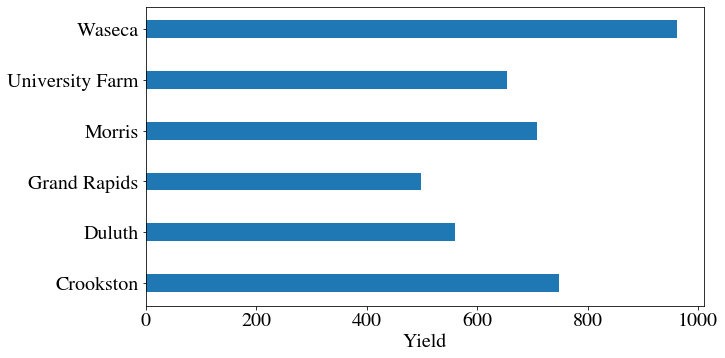

In [184]:
fig, ax = plt.subplots()
ax.barh(barley['yield'].index, barley['yield'], 0.35)
ax.set_xlabel('Yield')
plt.show()

### Seaborn

Just switch x and y variables to get a vertical plot.

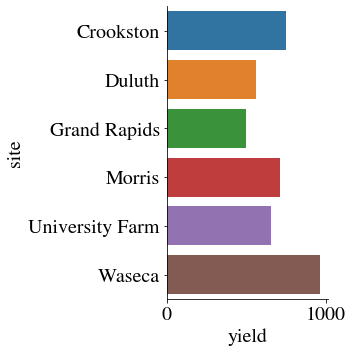

In [185]:
sns.catplot(
    data=barley.reset_index(),
    kind="bar",
    y="site", x="yield",
)

### Plotnine

Just omit `coord_flip()` to get a vertical plot.

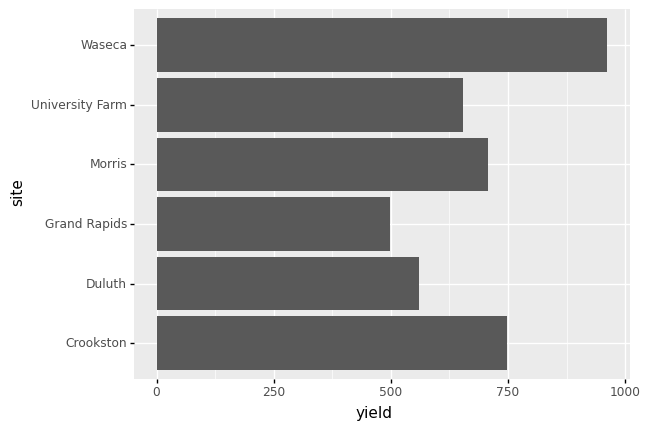

<ggplot: (8794725279127)>

In [186]:
(
    ggplot(barley.reset_index(), aes(x='site', y='yield'))
    + geom_col()
    + coord_flip()
)

### Altair

Just switch x and y to get a vertical plot.

In [187]:
alt.Chart(barley.reset_index()).mark_bar().encode(
    y='site',
    x='yield',
).properties(
    width=alt.Step(40)  # controls width of bar.
)

alt.Chart(...)

## Grouped bar chart



In [188]:
barley = data.barley()
barley = pd.DataFrame(barley.groupby(['site', 'year'])['yield'].sum()).reset_index()
barley.head()

site  year      yield
0     Crookston  1931  436.59999
1     Crookston  1932  311.79998
2        Duluth  1931  302.93333
3        Duluth  1932  257.00001
4  Grand Rapids  1931  290.53335

### Matplotlib

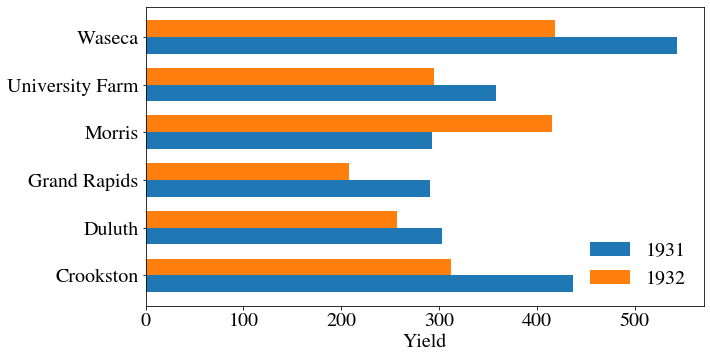

In [189]:
labels = barley['site'].unique()
y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.barh(y - width/2, barley.loc[barley['year'] == 1931, 'yield'], width, label='1931')
ax.barh(y + width/2, barley.loc[barley['year'] == 1932, 'yield'], width, label='1932')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Yield')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(frameon=False)
plt.show()

### Seaborn

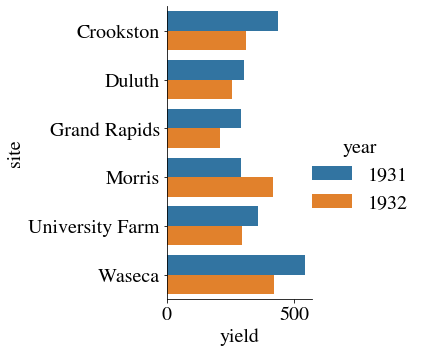

In [190]:
sns.catplot(
    data=barley,
    kind="bar",
    y="site", x="yield",
    hue="year"
)

### Plotnine

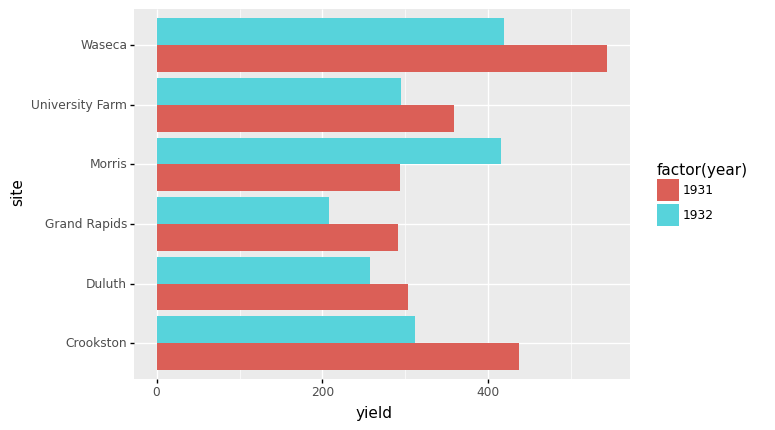

<ggplot: (8794722074703)>

In [191]:
(
    ggplot(barley, aes(x='site', y='yield', fill='factor(year)'))
    + geom_col(position='dodge')
    + coord_flip()
)

### Altair


In [192]:
alt.Chart(barley.reset_index()).mark_bar().encode(
    y='year:O',
    x='yield',
    color='year:N',
    row='site:N'
).properties(
    width=alt.Step(40)  # controls width of bar.
)

alt.Chart(...)

## Stacked bar chart



### Matplotlib 

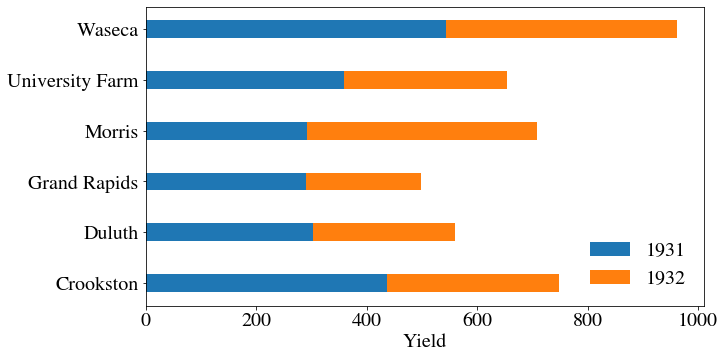

In [193]:
labels = barley['site'].unique()
y = np.arange(len(labels))  # the label locations
width = 0.35  # the width (or height) of the bars

fig, ax = plt.subplots()
ax.barh(y, barley.loc[barley['year'] == 1931, 'yield'], width, label='1931')
ax.barh(y, barley.loc[barley['year'] == 1932, 'yield'], width, label='1932', left=barley.loc[barley['year'] == 1931, 'yield'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Yield')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(frameon=False)
plt.show()

### Seaborn

As far as I know, there's no easy way of doing this.

### Plotnine



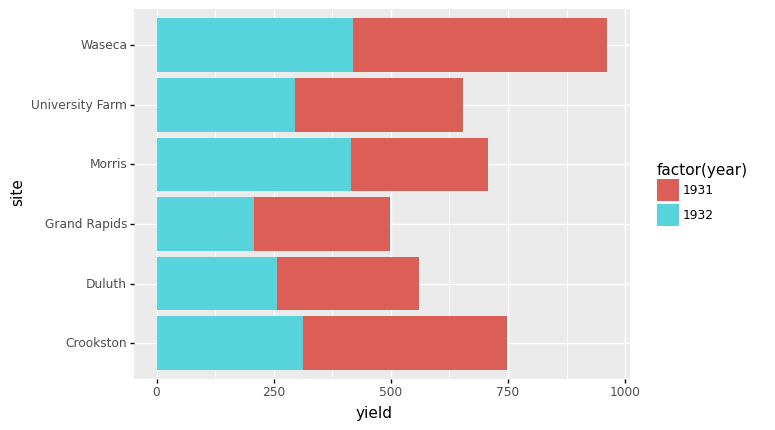

<ggplot: (8794728168346)>

In [194]:
(
    ggplot(barley, aes(x='site', y='yield', fill='factor(year)'))
    + geom_col()
    + coord_flip()
)

### Altair

In [195]:
alt.Chart(barley.reset_index()).mark_bar().encode(
    y='site',
    x='yield',
    color='year:N',
).properties(
    width=alt.Step(40)  # controls width of bar.
)

alt.Chart(...)

## Kernel density estimate

We'll use the diamonds dataset to demonstrate this.

In [196]:
diamonds = sns.load_dataset("diamonds").sample(1000)
diamonds.head()

carat        cut color clarity  depth  table  price     x     y     z
8018    1.01    Premium     E     SI1   61.7   56.0   4330  6.44  6.39  3.96
1583    0.70  Very Good     D     VS1   60.4   58.0   3008  5.71  5.78  3.47
9138    1.13  Very Good     H     SI2   59.8   59.0   4537  6.75  6.82  4.06
2787    0.76      Ideal     F     VS2   61.0   55.0   3257  5.89  5.92  3.60
52429   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65  5.69  3.47

### Matplotlib

Technically, there is a way to do this but it's pretty inelegant if you want a quick plot. That's because **matplotlib** doesn't do the density estimation itself. [Jake Vanderplas](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html) has a nice example but as it relies on a few extra libraries, I won't reproduce it here.

### Seaborn



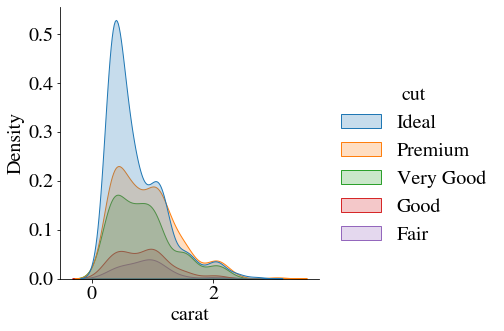

In [197]:
sns.displot(diamonds,
            x="carat", kind="kde", hue='cut',
            fill=True);

### Plotnine



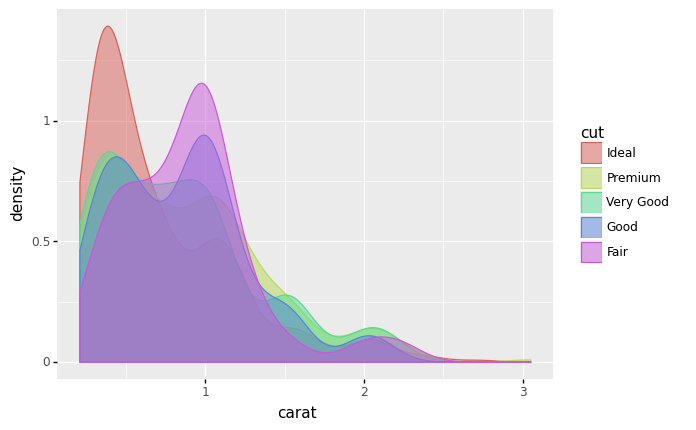

<ggplot: (8794730978690)>

In [198]:
(
   ggplot(diamonds, aes(x='carat', fill = 'cut', colour = 'cut')) +
   geom_density(alpha=0.5)
)

### Altair

In [199]:
alt.Chart(diamonds).transform_density(
    density='carat',
    as_=['carat', 'density'],
    groupby=['cut']
).mark_area(fillOpacity=0.5).encode(
    x='carat:Q',
    y='density:Q',
    color='cut:N',
)

alt.Chart(...)

## Histogram or probability density function

For this, let's go back to the penguins dataset.

In [200]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

### Matplotlib

The `density=` keyword parameter decides whether to create counts or a probability density function.

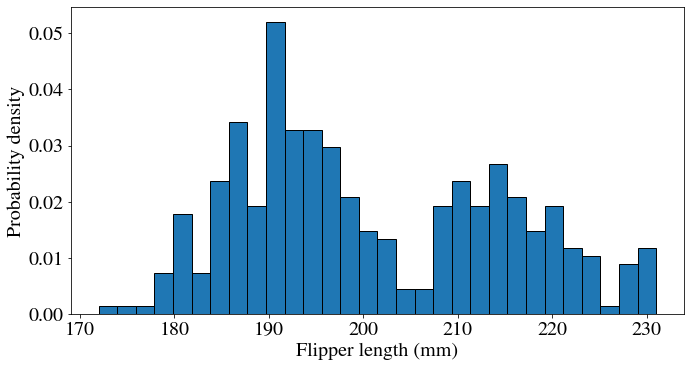

In [201]:
fig, ax = plt.subplots()
ax.hist(penguins['flipper_length_mm'], bins=30, density=True, edgecolor='k')
ax.set_xlabel('Flipper length (mm)')
ax.set_ylabel('Probability density')
fig.tight_layout()
plt.show()

### Seaborn

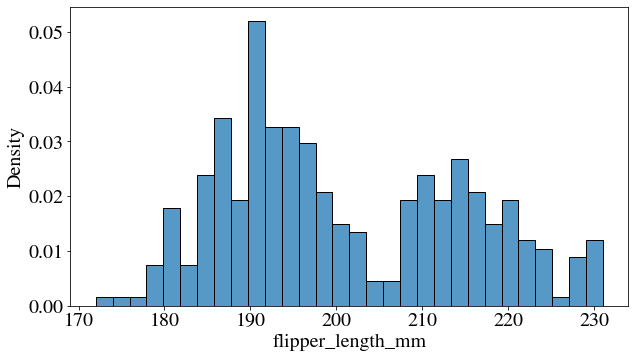

In [202]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=30, stat='density');

### Plotnine



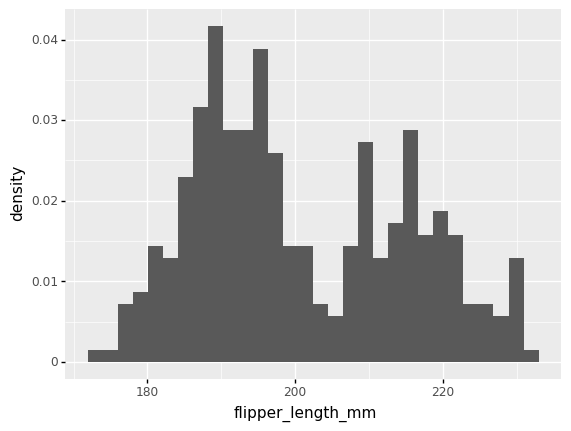

<ggplot: (8794725136827)>

In [203]:
(
    ggplot(penguins, aes(x='flipper_length_mm', y='stat(density)'))
    + geom_histogram(bins=30) # specify the binwidth
)

### Altair



In [204]:
alt.Chart(penguins).mark_bar().encode(
    alt.X("flipper_length_mm:Q", bin=True),
    y='count()',
)

alt.Chart(...)

## Marginal histograms



### Maplotlib

[Jaker Vanderplas's excellent notes](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html) have a great example of this, but now there's an easier way to do it with Matplotlib's new `constrained_layout` options.

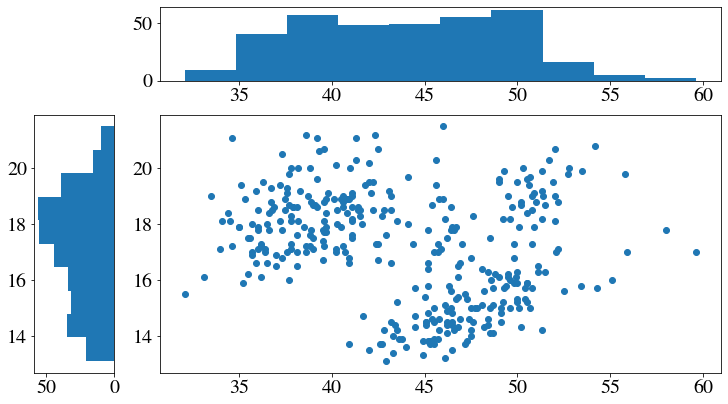

In [205]:
fig = plt.figure(constrained_layout=True)
# Create a layout with 3 panels in the given ratios
axes_dict = fig.subplot_mosaic([['.', 'histx'], ['histy', 'scat']],
                         gridspec_kw={'width_ratios': [1, 7],
                                      'height_ratios': [2, 7]})
# Glue all the relevant axes together
axes_dict['histy'].invert_xaxis()
axes_dict['histx'].sharex(axes_dict['scat'])
axes_dict['histy'].sharey(axes_dict['scat'])
# Plot the data
axes_dict['scat'].scatter(penguins['bill_length_mm'], penguins['bill_depth_mm'])
axes_dict['histx'].hist(penguins['bill_length_mm'])
axes_dict['histy'].hist(penguins['bill_depth_mm'], orientation='horizontal');

### Seaborn

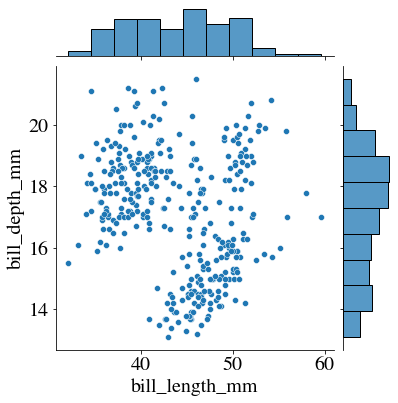

In [206]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm");

### Plotnine

I couldn't find an easy way to do this in plotnine but you can make rug plots, which have some similarities in terms of information conveyed.

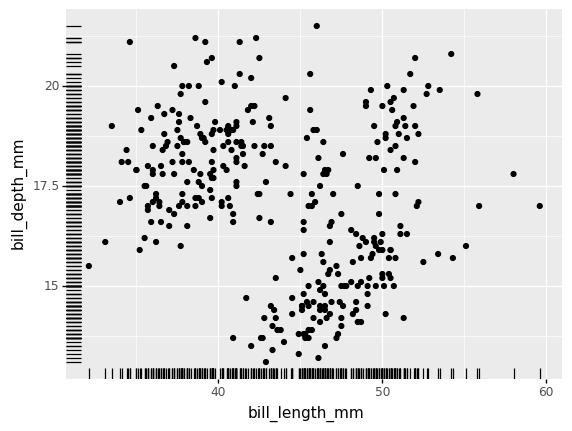

<ggplot: (8794719055288)>

In [207]:
(ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm')) +
  geom_point() +
  geom_rug())

### Altair

This is a bit fiddly.

In [208]:
base = alt.Chart(penguins)

xscale = alt.Scale(domain=(20, 60))
yscale = alt.Scale(domain=(10, 30))

area_args = {'opacity': .5, 'interpolate': 'step'}

points = base.mark_circle().encode(
   alt.X('bill_length_mm', scale=xscale),
   alt.Y('bill_depth_mm', scale=yscale)
)

top_hist = base.mark_area(**area_args).encode(
    alt.X('bill_length_mm:Q',
          # when using bins, the axis scale is set through
          # the bin extent, so we do not specify the scale here
          # (which would be ignored anyway)
          bin=alt.Bin(maxbins=30, extent=xscale.domain),
          stack=None,
          title=''
         ),
    alt.Y('count()', stack=None, title='')
).properties(height=60)

right_hist = base.mark_area(**area_args).encode(
    alt.Y('bill_depth_mm:Q',
          bin=alt.Bin(maxbins=30, extent=yscale.domain),
          stack=None,
          title='',
         ),
    alt.X('count()', stack=None, title=''),
).properties(width=60)

top_hist & (points | right_hist)

alt.VConcatChart(...)

## Heatmap

Heatmaps, or sometimes known as correlation maps, represent data in 3 dimensions by having two axes that forms a grid showing colour that corresponds to (usually) continuous values.

We'll use the flights data to show the number of passengers by month-year:

In [211]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers").T
flights.head()

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201

### Matplotlib



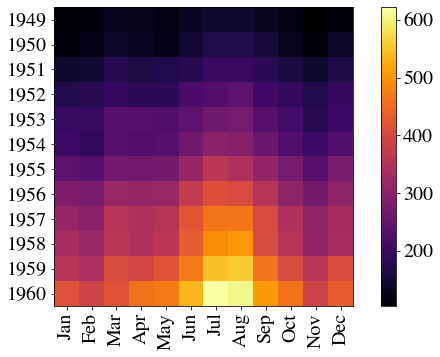

In [222]:
fig, ax = plt.subplots()
im = ax.imshow(flights.values, cmap='inferno')
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(flights.columns)))
ax.set_yticks(np.arange(len(flights.index)))
# Labels
ax.set_xticklabels(flights.columns, rotation=90)
ax.set_yticklabels(flights.index)
plt.show()

### Seaborn

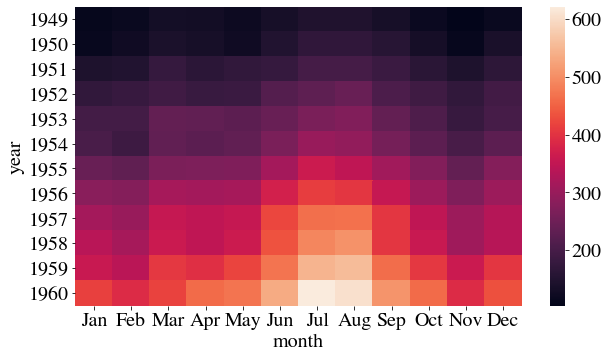

In [221]:
sns.heatmap(flights);

### Plotnine

Plotnine uses tidy data, rather than the wide data preferred by **matplotlib**, so we need to first get the original format of the flights data back:

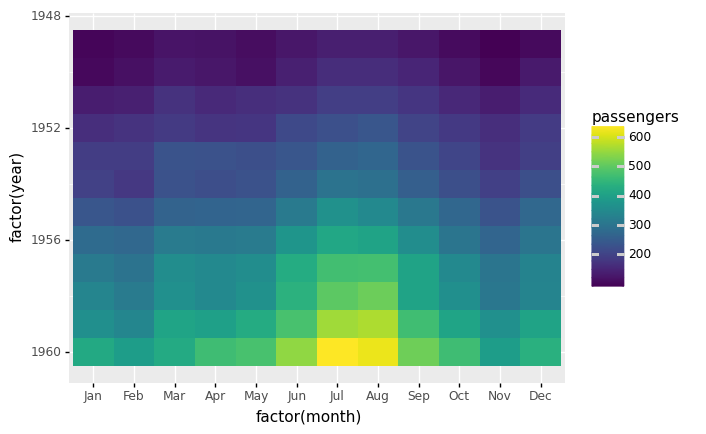

<ggplot: (8794725146513)>

In [255]:
flights = sns.load_dataset("flights")
(ggplot(flights, aes('month', 'factor(year)', fill='passengers'))
 + geom_tile()
 + scale_y_reverse()
)

### Altair

In [240]:
alt.Chart(flights).mark_rect().encode(
    x=alt.X('month', type='nominal', sort=None),
    y='year:O',
    color='passengers:Q'
)

alt.Chart(...)

## Boxplot

Let's use the tips dataset:

In [241]:
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### Matplotlib

There isn't a very direct way to create multiple box plots of different data in matplotlib in the case where the groups are unbalanced, so we create several different boxplot objects.


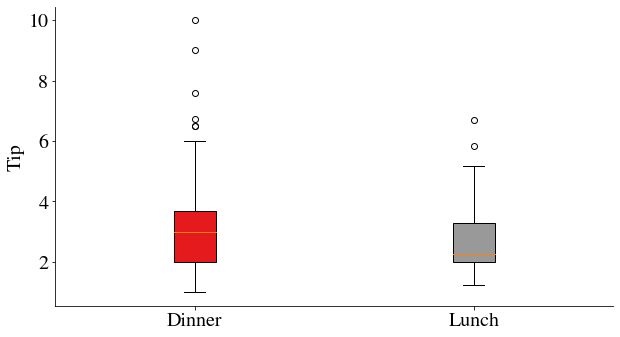

In [281]:
colormap = plt.cm.Set1
colorst = [colormap(i) for i in
           np.linspace(0, 0.9, len(tips['time'].unique()))]

fig, ax = plt.subplots()
for i, grp in enumerate(tips['time'].unique()):
    bplot = ax.boxplot(tips.loc[tips['time']==grp, 'tip'],
               positions=[i],
               vert=True,  # vertical box alignment
               patch_artist=True,  # fill with color
               labels=[grp]) # X label
    for patch in bplot['boxes']:
        patch.set_facecolor(colorst[i])

ax.set_ylabel('Tip')
plt.show()

### Seaborn


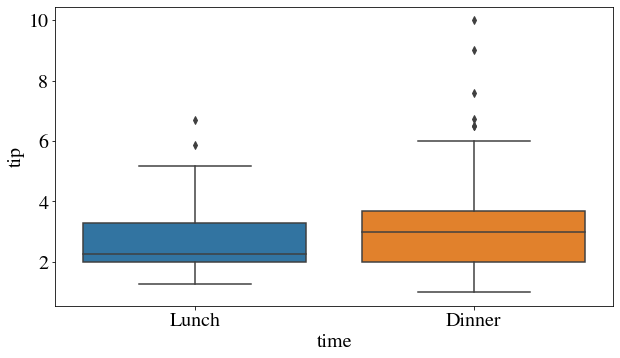

In [277]:
sns.boxplot(y=tips['tip'], x=tips['time']);

### Plotnine



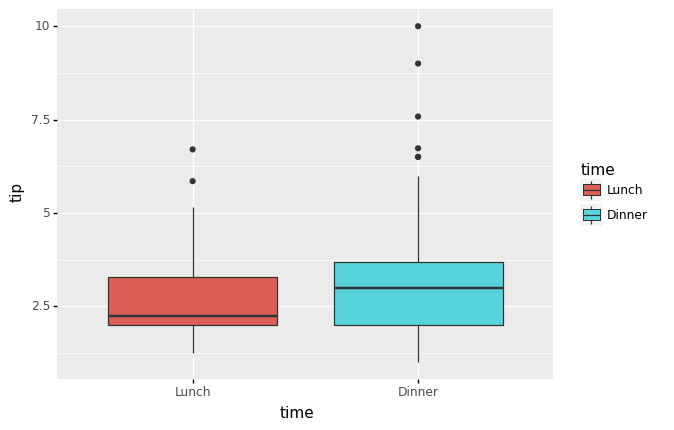

<ggplot: (8794704238698)>

In [283]:
(
    ggplot(tips)
    + geom_boxplot(aes(y='tip', x='time', fill='time'))
)

### Altair

In [289]:
alt.Chart(tips).mark_boxplot(size=50).encode(
    x='time:N',
    y='tip:Q',
    color='time:N'
).properties(width=300)

alt.Chart(...)

## Violin plot